    LifeSatisfaction  HealthLifeExpect  JobsEmploymRate  CommunitySupport
0                7.3              82.5             73.0              95.0
1                7.1              81.7             72.0              92.0
2                6.9              81.5             63.0              91.0
3                6.4              74.8             61.0              90.0
4                7.4              81.9             73.0              93.0
5                6.5              79.9             63.0              85.0
6                6.3              76.2             67.0              89.0
7                6.7              79.1             74.0              91.0
8                7.6              80.9             74.0              95.0
9                5.7              77.8             74.0              92.0
10               7.6              81.5             70.0              95.0
11               6.5              82.4             65.0              90.0
12               7.0              81.1

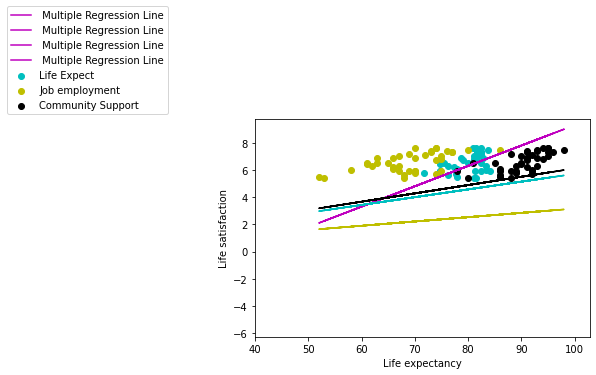

In [19]:
import pandas as pd
import researchpy as py
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

#####KEEP CATEGORY OF INTEREST IN POS 0

cat = ['LifeSatisfaction','HealthLifeExpect','JobsEmploymRate','CommunitySupport']

def readcsv(name, cat_Type, *categories):
    df = pd.read_csv(name)


    df = df.replace(r'^\s*$', np.nan, regex=True)

    for category in categories:
        df[category] = df[category].astype(cat_Type)
        
    return df

df =readcsv('2020Data.csv',float,cat)


new_df = df[[cat[0],cat[1],cat[2],cat[3]]]
new_df = new_df.dropna()

new_df = new_df.drop([33])
new_df = new_df.reset_index()
new_df = new_df.drop(['index'],axis=1)
print(new_df)
y = np.array(new_df[cat[0]])
x1 = np.array(new_df[cat[1]])
x2 = np.array(new_df[cat[2]])
x3 = np.array(new_df[cat[3]])
X = np.array(new_df[cat[1:4]])

# model = LinearRegression().fit(x,y)
# r_sq = model.score(x,y)
# print(r_sq)
x = sm.add_constant(X)

models = sm.OLS(y,x)
results = models.fit()
print(results.summary())
print(results.rsquared)
print(results.rsquared_adj)
print(results.params)

y_res = results.resid

pred_x = results.fittedvalues
pred_y = results.predict(x)

p=results.params
# x=np.arange(0,100)


fig,ax = plt.subplots()
ax.plot(x,(p[0]+p[1]*x+p[2]*x+p[3] * x), color = 'm',label = ' Multiple Regression Line')
# ax.plot(x,p[0],color ='#03fc6b', label = 'Regression const')
ax.plot(x,p[1]*x,color= 'c')
ax.plot(x,p[2]*x,color= 'y')
ax.plot(x,p[3]*x,color ='k')
# ax.set_size_inches(20, 15)
# ax.set_autoscale_on
ax.set_xlim(40)
ax.scatter(x1,y, color = 'c', label = 'Life Expect')
ax.scatter(x2,y, color = 'y', label = 'Job employment')
ax.scatter(x3,y, color = 'k', label = 'Community Support')
plt.ylabel('Life satisfaction')
plt.xlabel('Life expectancy')
# ax.axis('equal')
leg = ax.legend(loc='lower center',bbox_to_anchor=(-0.5,1));

In [90]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title'

100
39


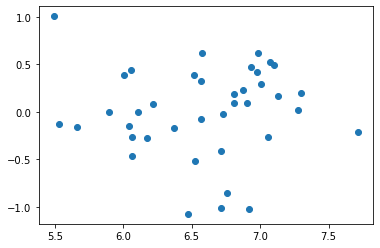

LeveneResult(statistic=16.25865012817107, pvalue=3.2382050145086725e-09)


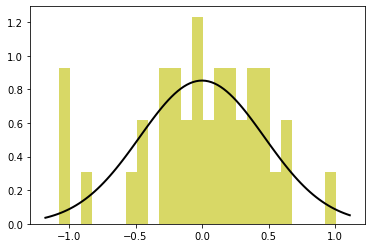

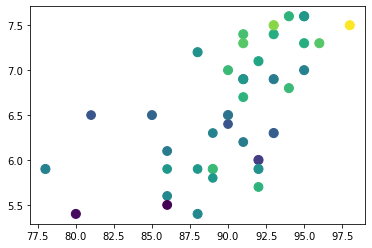

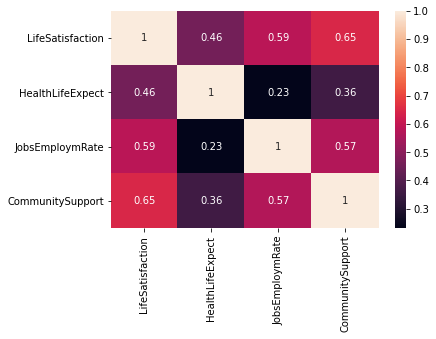

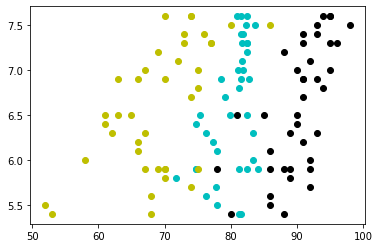

In [21]:
print(len(x))
print(len(y))
plt.scatter(pred_x,y_res)
plt.show()
print(stats.levene(y,x1,x2,x3))

mu,std = stats.norm.fit(y_res)

plt.hist(y_res, bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
plt.show()

plt.scatter(x3,y,x1,x2)
plt.show() 

corr = new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# plt.scatter(pred_,y_res)
plt.show()

# sns.lmplot(x='CommunitySupport',y='LifeSatisfaction',hue = 'Community Support')
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1,y,color = 'c')
ax1.scatter(x2,y,color = 'y')
ax1.scatter(x3,y, color = 'k')
plt.show()

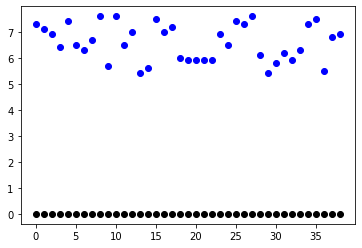

In [56]:
X = new_df[[cat[1],cat[2],cat[3]]]
y = new_df[cat[0]]

theta = np.array([0]*len(X.columns))
m = len(new_df)

def hypothesis(theta, X):
    return theta*X

# for i in range(1, len(X.columns)):
#     X.loc[i-1] = X.loc[i-1]/np.max(X.loc[i-1])
# X.head()

def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(new_df))

def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

J, j, theta = gradientDescent(X, y, theta, 1, 1000)

y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

plt.figure()
plt.scatter(x=list(range(0, len(X))),y= y, color='blue')         
plt.scatter(x=list(range(0, len(X))), y=y_hat, color='black')
plt.show()

In [64]:

y1 = hypothesis(theta, X)
y1 = np.sum(y1, axis=1)
.05*(sum((y1-y)*X.iloc[:,2])/len(X))



-29.774102564102567